In [1]:
import sys
import os
sys.path.append('/home/yutanagano/Projects/tcr_embedder')
os.chdir('/home/yutanagano/Projects/tcr_embedder')

In [2]:
import json
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import seaborn

seaborn.set_theme()
seaborn.set_style('white')

In [3]:
BENCHMARKING_PARENT_DIR = Path('benchmarks')

In [4]:
metric_dicts = []

for model in BENCHMARKING_PARENT_DIR.iterdir():
    with open(model/'metrics.json', 'r') as f:
        metric_dicts.append(json.load(f))

In [5]:
metrics = pd.DataFrame(metric_dicts)
metrics = metrics.sort_values(by='model_name', ignore_index=True)

In [6]:
metrics

,model_name,alignment,uniformity,alignment + uniformity,5nn_accuracy
0,CDR3BERT_c_6_128_8_512-embed_5,0.605934,-0.698529,-0.092595,0.237917
1,atchley_embedder,0.972870,-0.980380,-0.007510,0.122083
2,cdr3_levenshtein,8.164297,-6.755688,1.408610,0.170000
3,random_embedder_0,0.133281,-0.168128,-0.034847,0.075417
4,random_embedder_1,0.188695,-0.218463,-0.029768,0.070625
5,random_embedder_2,0.126440,-0.166346,-0.039906,0.071458
6,random_embedder_3,0.116590,-0.150309,-0.033719,0.071250
7,random_embedder_4,0.209874,-0.253276,-0.043402,0.073125


In [7]:

def collapse_names(name):
    groups = (
        'random_embedder',
        'UnsupSimCTE_CDR3BERT_cp',
        'SupSimCTE_CDR3BERT_cp',
        'CDR3BERT_cp',
        'CDR3BERT_c'
    )

    for group in groups:
        if group in name:
            return group
    
    return name

metrics['model_name'] = metrics['model_name'].map(collapse_names)

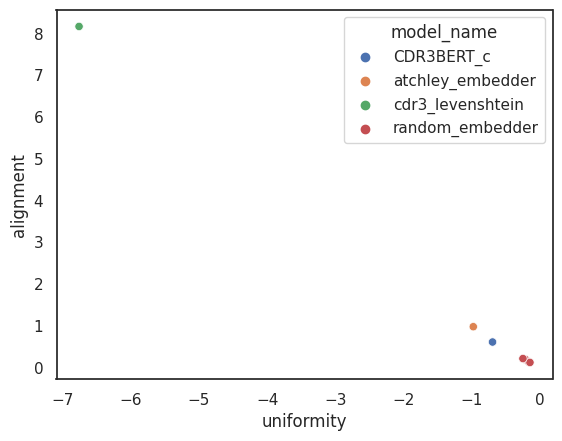

In [8]:
scatter_model_names = seaborn.scatterplot(metrics, x='uniformity', y='alignment', hue='model_name')
plt.show()

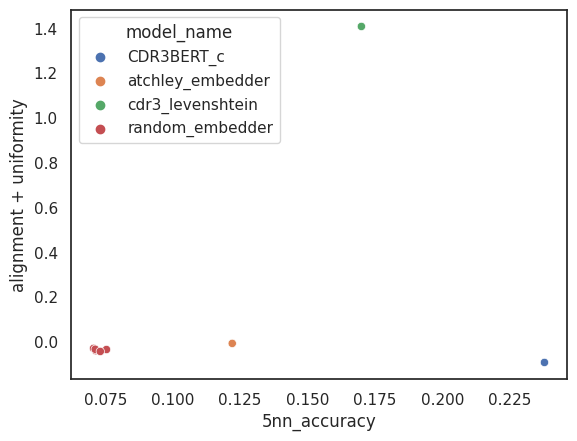

In [9]:
scatter_model_names = seaborn.scatterplot(metrics, x='5nn_accuracy', y='alignment + uniformity', hue='model_name')
plt.show()

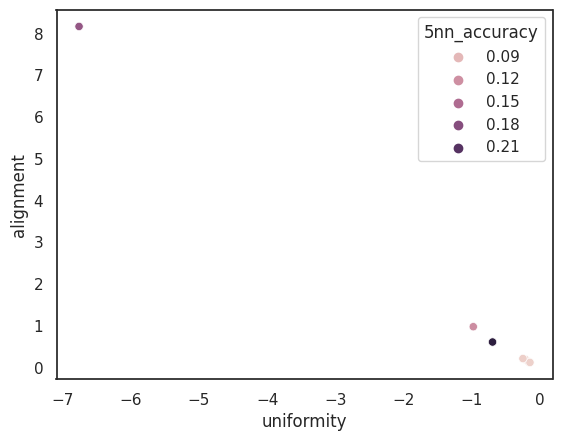

In [10]:
scatter_5nn_accs = seaborn.scatterplot(metrics, x='uniformity', y='alignment', hue='5nn_accuracy')
plt.show()